# Paper replication

This project is a replication attempt of results of figure 2.a found in the paper "E. Cho, S. A. Myers, and J. Leskovec, ‘Friendship and mobility: user movement in location-based social networks’, in Proceedings of the 17th ACM SIGKDD international conference on Knowledge discovery and data mining - KDD ’11, San Diego, California, USA, 2011, p. 1082, doi: 10.1145/2020408.2020579."


#  1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Library to compute distances between users' homes using Latitude Longitude coordinates
from geopy import distance
# Libraries to plot users locations on a map
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#  2. Importing Data from data folder

In [2]:
# Data folder path
DATA_FOLDER_PATH = "../data"
# Look for compressed files in this folder and save them in paths
paths = [os.path.join(DATA_FOLDER_PATH,f) for f in os.listdir(DATA_FOLDER_PATH) if f.endswith('.gz')]
# Printing paths to check if all folders are there
paths

['../data/loc-gowalla_totalCheckins.txt.gz',
 '../data/loc-brightkite_edges.txt.gz',
 '../data/loc-brightkite_totalCheckins.txt.gz',
 '../data/loc-gowalla_edges.txt.gz']

In [3]:
# import gowalla_totalcheckins data
df_gowalla_totalCheckins = pd.read_csv(paths[0],sep='\t',compression='gzip',header=None,
                                       names=['user','check-in_time','latitude','longitude','location_id'])

In [4]:
# Printing gowalla check-ins dataframe 
df_gowalla_totalCheckins

,user,check-in_time,latitude,longitude,location_id
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878
...,...,...,...,...,...
6442887,196578,2010-06-11T13:32:26Z,51.742988,-0.488065,906885
6442888,196578,2010-06-11T13:26:45Z,51.746492,-0.490780,965121
6442889,196578,2010-06-11T13:26:34Z,51.741916,-0.496729,1174322
6442890,196585,2010-10-08T21:01:49Z,50.105516,8.571525,471724


In [5]:
# Dropping location_id and check-in_time as it's not needed for our replication
df_gowalla_totalCheckins.drop(columns=['check-in_time','location_id'],inplace=True)

In [6]:
# import brightkite_totalCheckins data
# Similarely, we set the columns name as explained in the dataset informations
df_brightkite_totalCheckins = pd.read_csv(paths[2],sep='\t',compression='gzip',header=None,
                                       names=['user','check-in_time','latitude','longitude','location_id'])

In [7]:
# Printing brightkite check-ins dataframe 
df_brightkite_totalCheckins

,user,check-in_time,latitude,longitude,location_id
0,0,2010-10-17T01:48:53Z,39.747652,-104.992510,88c46bf20db295831bd2d1718ad7e6f5
1,0,2010-10-16T06:02:04Z,39.891383,-105.070814,7a0f88982aa015062b95e3b4843f9ca2
2,0,2010-10-16T03:48:54Z,39.891077,-105.068532,dd7cd3d264c2d063832db506fba8bf79
3,0,2010-10-14T18:25:51Z,39.750469,-104.999073,9848afcc62e500a01cf6fbf24b797732f8963683
4,0,2010-10-14T00:21:47Z,39.752713,-104.996337,2ef143e12038c870038df53e0478cefc
...,...,...,...,...,...
4747282,58222,2009-01-23T02:30:34Z,33.833333,35.833333,9f6b83bca22411dd85460384f67fcdb0
4747283,58224,2009-01-03T15:06:54Z,33.833333,35.833333,9f6b83bca22411dd85460384f67fcdb0
4747284,58225,2009-01-20T13:58:14Z,33.833333,35.833333,9f6b83bca22411dd85460384f67fcdb0
4747285,58226,2009-01-20T13:30:09Z,33.833333,35.833333,9f6b83bca22411dd85460384f67fcdb0


In [8]:
# Dropping location_id and check-in_time as it's not needed for our replication
df_brightkite_totalCheckins.drop(columns=['check-in_time','location_id'],inplace=True)

In [9]:
# import gowalla_edges data
# There is no header in the file, we explicetly name the columns
df_gowalla_edges = pd.read_csv(paths[3],sep='\t',compression='gzip',header=None,names=['user1','user2'])

In [10]:
# Display gowalla edges. Each edge represent a friendship between two users
df_gowalla_edges

,user1,user2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
1900649,196586,196539
1900650,196587,196540
1900651,196588,196540
1900652,196589,196547


In [11]:
# import brightkite_edges data
# Similarely, we explicetly name the columns
df_brightkite_edges = pd.read_csv(paths[1],sep='\t',compression='gzip',header=None,names=['user1','user2'])

In [12]:
# Display brightkite edges. Each edge represent a friendship between two users
df_brightkite_edges

,user1,user2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
428151,58225,58226
428152,58225,58227
428153,58226,58220
428154,58226,58225


#  3. Data Cleaning


## 3.1 Latitude Longitude Correction

* Latitude must be between [-90,90] degrees and [-180,180] for the longitude.
* We need to check this in each checkins' dataframe

In [13]:
def correct_latitude(lat):
    """
    This function corrects for out of range latitude.
    
    Input: 
    -- lat: latitude coordinates in °
    Output: 
    -- lat: latitude coordinates put between -90 and 90°
    """
    while lat>90 or lat<-90:
        if lat>90:
            lat = lat-180
        elif lat<-90:
            lat = lat+180
    return lat

In [14]:
def correct_longitude(long):
    """
    This function corrects for out of range longitude.
    
    Input: 
    -- long: longitude coordiantes in °
    Output: 
    -- long: longitude coordinates put between -180 and 180°
    """
    while long>180 or long<-180:
        if long>180:
            long = long - 360
        elif long<-180:
            long = long +360
    return long

### 3.1.1. Gowalla check-ins dataset

In this step we will verify if the latitude and longitude data are in the correct range. We will manually check for erroneous data and correct it using previously defined functions. We will be also deleting rows containing nan values

In [15]:
df_gowalla_totalCheckins[(df_gowalla_totalCheckins.latitude<-90)|(df_gowalla_totalCheckins.latitude>90)]

,user,latitude,longitude
3795278,59536,405.550734,151.331785
3795280,59536,404.629219,152.464940
3795299,59536,405.646925,151.255792
3795312,59536,405.658498,151.256815
3795317,59536,405.624976,151.234238
5660494,132930,402.091872,153.116143
5660495,132930,402.026603,153.026752
5660496,132930,402.026603,153.026752
5660538,132930,402.092095,153.108208
5660539,132930,402.026733,153.026861


In [16]:
# Correction of latitude
df_gowalla_totalCheckins.latitude = df_gowalla_totalCheckins.latitude.apply(correct_latitude)

In [17]:
# Verification if latitude is corrected
df_gowalla_totalCheckins[(df_gowalla_totalCheckins.latitude<-90)|(df_gowalla_totalCheckins.latitude>90)]

,user,latitude,longitude


In [18]:
# Check for out of range longitude in gowalla checkins
df_gowalla_totalCheckins[(df_gowalla_totalCheckins.longitude<-180)|(df_gowalla_totalCheckins.longitude>180)]

,user,latitude,longitude


In [19]:
#drop nan values
df_gowalla_totalCheckins.dropna(inplace=True)

### 3.1.2. Brightkite check-ins dataset

We will repeat the same steps we followed previously on Brightkite

In [20]:
df_brightkite_totalCheckins[(df_brightkite_totalCheckins.latitude>90)|(df_brightkite_totalCheckins.latitude<-90)]

,user,latitude,longitude
203793,271,-94.578567,39.099727
203794,271,-94.578567,39.099727
203795,271,-94.578567,39.099727
203796,271,-94.578567,39.099727
1824796,7433,-163.193333,-18.060833
...,...,...,...
3231790,14201,151.092167,-33.870000
3231791,14201,151.092167,-33.870000
3231792,14201,151.092167,-33.870000
3231793,14201,151.092167,-33.870000


In [21]:
# Correction of latitude
df_brightkite_totalCheckins.latitude = df_brightkite_totalCheckins.latitude.apply(correct_latitude)

In [22]:
# Verification if latitude is corrected
df_brightkite_totalCheckins[(df_brightkite_totalCheckins.latitude>90)|(df_brightkite_totalCheckins.latitude<-90)]

,user,latitude,longitude


In [23]:
# Check for out of range longitude in Brightkite checkins
df_brightkite_totalCheckins[(df_brightkite_totalCheckins.longitude<-180)|
                            (df_brightkite_totalCheckins.longitude>180)]

,user,latitude,longitude


In [24]:
#drop nan values
df_brightkite_totalCheckins.dropna(inplace=True)

## 3.2. Friendships duplicated edges

As friendship relations are mutual, we don't want to keep duplicates. For example, if user1 is friend with user2, user2 is also a friend of user1. We want to keep only one undirected edge.

To do that, we first compute the maxmimum number of digits of the user_id, call it "n". We will then convert each user id to a string of length n. Next, we will concatenate these to "strings" in sorted order so that if we swap users id we will keep the same concatenated string.

It is important to compute the "n" to avoid some collisions. For example, a string "2332" can be the result of user1 = 23, user2= 32, or user1= 2 and user2 = 332. However, if we fix the length of the string, say 6, we will get a '000023000032' for the first case and '000002000332' and the problem is solved.

### 3.2.1 Gowalla edges

In [25]:
# Let's first compute the number of digits of the maximum user_id
len(str(df_gowalla_edges['user1'].max()))

6

In [26]:
# To remove duplicates, we will add another column consisting of the concatenation of user1 index and user2 index.
# We concatenate them in sorted order so if we swap them we will keep the same order
df_gowalla_edges['edge'] = df_gowalla_edges.\
                            apply(lambda row:''.join(sorted([format(row['user1'],'06d'), 
                                                             format(row['user2'],'06d')])),axis=1)

In [27]:
df_gowalla_edges

,user1,user2,edge
0,0,1,000000000001
1,0,2,000000000002
2,0,3,000000000003
3,0,4,000000000004
4,0,5,000000000005
...,...,...,...
1900649,196586,196539,196539196586
1900650,196587,196540,196540196587
1900651,196588,196540,196540196588
1900652,196589,196547,196547196589


In [28]:
# Removing duplicates and dropping the unnecessary column
df_gowalla_edges.drop_duplicates('edge',inplace=True)
df_gowalla_edges.drop(columns=['edge'],inplace=True)
df_gowalla_edges

,user1,user2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
1900599,196551,196554
1900602,196552,196554
1900604,196553,196554
1900617,196561,196590


### 3.2.2 Brightkite edges

In [29]:
# Let's first compute the number of digits of the maximum user_id
len(str(df_brightkite_edges['user1'].max()))

5

In [30]:
# We repeat the same operation on brightkite_edges dataframe
df_brightkite_edges['edge'] = df_brightkite_edges.\
                            apply(lambda row:''.join(sorted([format(row['user1'],'05d'), 
                                                             format(row['user2'],'05d')])),axis=1)

In [31]:
# Removing duplicates and dropping the unnecessary column
df_brightkite_edges.drop_duplicates('edge',inplace=True)
df_brightkite_edges.drop(columns=['edge'],inplace=True)
df_brightkite_edges

,user1,user2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
428142,58219,58224
428144,58220,58225
428145,58220,58226
428151,58225,58226


# 4. Compute home position for every user in each dataset

Now that latitude and longitude coordinates are corrected and put on the right range, we will descretize the world into 25x25 $km^2$ and compute the user average position in the most visited square. This will help us approximate users' homes positions. We will do the same operations on each check-ins dataset

## 4.1. Discretizing the world

We know that the earth is not a perfect sphere. However, the difference between the circonference around the poles (40,007 km) and around the equator (40,075 km) is very small (around 0.16%). Therefore, we can approximate Earth as a perfect sphere of diameter 40000 km. 

Moreover, as the latitude sits between [-90,90] and latitude lines go through earth poles we can compute easily compute $\Delta \lambda$ the angle step that results to 25km edge which is equal to the following expression:

\begin{equation}
\Delta \lambda = \frac{180}{40000/(2*25)} = 0.225^{o}
\end{equation}

However, for the longitude, we should take into account the latitude angle. We should first compute the resulting the new perimeter which can be simply computed using the following equation:

\begin{equation}
P_{\lambda} = cos(\lambda)*P_{Earth}
\end{equation}

Using this new perimeter, we can compute $\Delta \phi$ the angle step along a longitudinal line that results into a 25km edge.

\begin{equation}
\Delta \phi(\lambda) = \frac{360}{P_{\lambda}/25}
\end{equation}


Note that we slightly change the earth diameter to obtain round values. This should not affect the quality of our discretizing as we approximately loose only 4.375m  along a latutide line in each cell which represents 0.017% of 25km edge of our square.

We also note that it is not possible to precisely divide the surface of a sphere with equaly sized squares without any undesired distorsion. Recall that what we want to do is approximate users' homes location so we assume that our approximation is quite good.

In [32]:

# Preparing arrays for discretizing the world
# This arrays will be passed as arguments to the aggregation function which will avoid making unnecessary
# computations each time we call the function

EARTH_PERIMETER = 40000
# Compute number of 25km steps of half of the perimeter of earth
n_lat = int((EARTH_PERIMETER/2)/25)
# Compute delta_lat which corresponds to a latitude angle step to obtain 25km
delta_lat = 180/n_lat
# Discretized Latitdue. Each step correspond to 25km along a latitudinal geodesic
discretized_lat = np.arange(-90,90 + delta_lat,delta_lat)
# Compute deltas_long which corresponds to list containing longitudinal angle steps for different latitudes
deltas_long = []
for lat in discretized_lat:
    # Compute perimeter of the earth for a given latitude angle
    perimeter_in_lat = np.cos(np.deg2rad(lat))*EARTH_PERIMETER
    # Compute number of 25km steps along the previously calculated perimeter
    n_long = int(round(perimeter_in_lat/25))
    
    # n_long can be 0 if latitude is 90 or -90
    # If n_long is 0, we chose delta_long = 999 which is impossible to have since the longitude 
    # sits between [-180,180]
    if n_long == 0:
        delta_long = 999
    else:
    # else compute delta_long
        delta_long = 360/n_long
    # Append delta_long to deltas_long list    
    deltas_long.append(delta_long)

## 4.2. Checking our discretizing

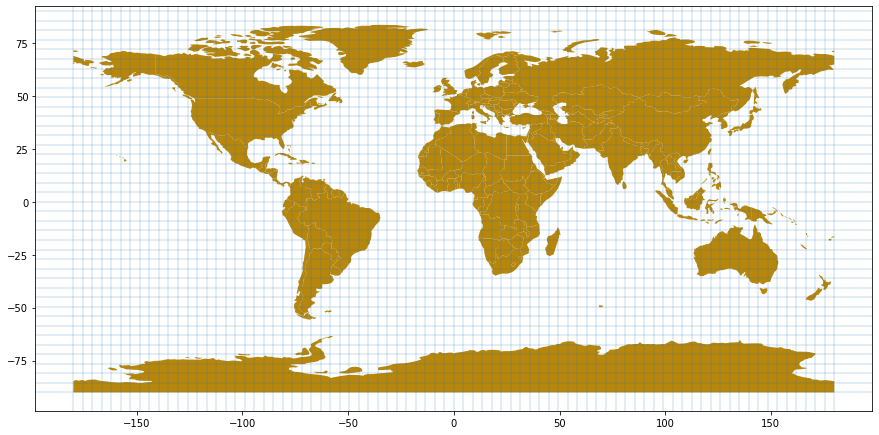

In [33]:
# select map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# define ax and plot the map
ax = world.plot(figsize=(15, 9), color = 'darkgoldenrod')
for i in range(len(discretized_lat)):
    # Plotting all latitiudinal lines would result to an unclear plot. We plot every 20 points
    if i%20 == 0:
        ax.axhline(discretized_lat[i],linewidth=0.25)
        # Compute a discretized longitudinal array
        discretized_long = np.arange(-180,180 + deltas_long[i],deltas_long[i])
        for j in range(len(discretized_long)):
            # Similarely, we plot every 20 points
            if j%20 == 0:
                ax.axvline(discretized_long[j],discretized_lat[i],discretized_lat[i]+20*delta_lat,linewidth=0.25)


## 4.3. Defining a function to compute users' home location

In [34]:
def compute_home_position(df, delta_lat, deltas_long):
    """
    This function takes the check-ins of a user and discretitze the world to 25x25km^2
    It looks for the square where there is the most check-ins
    compute the average location in that square which is considered as the home location
    
    Input: 
    -- df :Dataframe containing latitude and longitude columns
    -- delta_lat: Latitude angle step
    -- deltas_long: An array containing longitude angle step for different latitude angles
    
    Output: An aggregation containing the home_latitude and home_longitude
    -- home_latitude: an estimation of user's home latitude
    -- home_longitude: an estimation of user's home longitude
    """
    n = len(deltas_long)
    #Preparing counting array
    counting = np.zeros((n,2*n))
    mask = np.empty((n,2*n),dtype=object)
    latitude = df.latitude.values
    longitude = df.longitude.values
    for i in range(len(df)):
        # Compute the index of discretized latitude
        # We add 90 to obtain positive integers. Recall latitude sits between [-90,90]
        j = int(round((latitude[i] + 90)/delta_lat))
        # Compute the index of discretized longitude 
        # We add 180 to obtain positive integers. Recall longitude sits between [-180,180]
        k = int(round((longitude[i] + 180)/deltas_long[j]))
        # Increase counter in the counting array
        counting[j,k]+=1
        #track the locations that led to an increase in the the counting array
        mask[j,k] = np.append(mask[j,k],i)
    
    # Find the square with most visits
    max_index = np.unravel_index(np.argmax(counting),counting.shape)
    # Build a df_mask to retrace locations in the most visited square
    df_mask = list(mask[max_index])[1:]
    
    # Compute average latitidue in that square
    home_latitude = np.mean(df.latitude.iloc[df_mask])
    # Compute average longitude in that square
    home_longitude = np.mean(df.longitude.iloc[df_mask])
    
    return home_latitude,home_longitude

## 4.4. Plotting a selected user's location on a map
First let's check the check-ins of one user

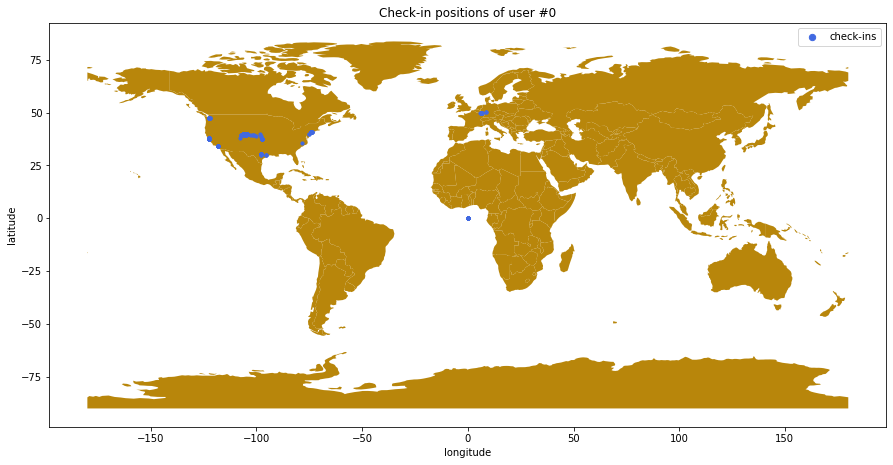

In [35]:
# select user index to track its check-ins and home location
user_index = 0
# select user's raw check-ins data 
user_0  =  df_brightkite_totalCheckins.groupby(by='user').get_group(user_index)
# compute geometry to plot locations on world map and build dataframe
geometry = [Point(xy) for xy in zip(user_0['longitude'], user_0['latitude'])]
gdf = GeoDataFrame(user_0, geometry=geometry) 
# select map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# define ax and plot the map
ax = world.plot(figsize=(15, 9), color = 'darkgoldenrod')
# plot check-ins
gdf.plot(ax=ax, marker='.', color='royalblue', markersize=40);
# plot home location

plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('Check-in positions of user #{}'.format(user_index))
plt.legend(['check-ins'],markerscale=2)

## 4.5. Computing home positions

In [36]:
# Computing average home position for BrightKite dataset
users_brightkite_home_location = df_brightkite_totalCheckins.groupby(by='user')\
                                .agg(compute_home_position,delta_lat,deltas_long)
users_brightkite_home_location

,latitude,longitude
user,,
0,39.782612,-105.003885
1,37.602449,-122.381606
2,39.776274,-105.010043
3,37.767867,-122.424768
4,60.171638,24.936969
...,...,...
58222,33.833333,35.833333
58224,33.833333,35.833333
58225,33.833333,35.833333


In [37]:
# Computing average home position for Gowalla dataset
users_gowalla_home_location = df_gowalla_totalCheckins.groupby(by='user')\
                                .agg(compute_home_position,delta_lat,deltas_long)
users_gowalla_home_location

,latitude,longitude
user,,
0,30.273455,-97.749247
1,44.724746,5.032961
2,37.840347,-122.250501
4,37.777994,-122.437533
5,30.292597,-97.734593
...,...,...
196544,-25.433409,-49.281533
196561,37.529407,-122.006288
196577,51.327210,0.743228


## 4.6. Checking home positions of a user

* Checking home position for different users

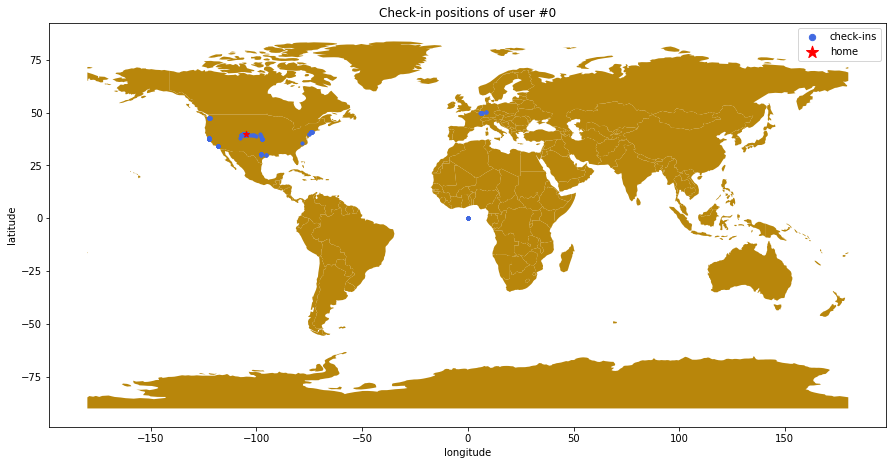

In [38]:
# select user index to track its check-ins and home location
user_index = 0
# select user home location (brightkite dataset is used for this example)
user_home = users_brightkite_home_location[['longitude','latitude']].iloc[user_index].values
# select user's raw check-ins data 
user_0  =  df_brightkite_totalCheckins.groupby(by='user').get_group(user_index)
# compute geometry to plot locations on world map and build dataframe
geometry = [Point(xy) for xy in zip(user_0['longitude'], user_0['latitude'])]
gdf = GeoDataFrame(user_0, geometry=geometry) 
# build dataframe for home location
home_df = GeoDataFrame(users_gowalla_home_location.iloc[user_index].to_frame().transpose()[['longitude','latitude']]
                       ,geometry=[Point(user_home)])
# select map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# define ax and plot the map
ax = world.plot(figsize=(15, 9), color = 'darkgoldenrod')
# plot check-ins
gdf.plot(ax=ax, marker='.', color='royalblue', markersize=40);
# plot home location
home_df.plot(ax=ax, marker='*', color='red', markersize=40)

plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('Check-in positions of user #{}'.format(user_index))
plt.legend(['check-ins','home'],markerscale=2)

# 5. Extend social network edges using the check-ins dataset

As explained previously, the edges of each social network determine the friendship between users. 
What we want to do later is to compute the distance between friends' home. To do that, we will start by creating a new dataframe which contain user1 user2 and the home location of each one then compute distance between these two. 

## 5.1. Distance computation

Distance computation is done using geopy library. We will round the distances to obtain integers. This is needed for pmf computation (which we will see in the next section)

In [39]:
def compute_distance_km(row):
    """
    This function takes a row containing latitude and longitude of user x and latitude longitude of user2
    It uses geopy library to compute the distance between the location of these users based on their 
    geocoordinates
    
    Input: 
    -- row: a row of a dataframe containing attributes 'latitude_x','latitude_y','longitude_x','longitude_y'
    
    Output: 
    -- distance: Geodesic distance between the two points rounded
    """
    # define point1
    point1= (row['latitude_x'],row['longitude_x'])
    # define point2
    point2= (row['latitude_y'],row['longitude_y'])
    # compute distance in km using geopy library
    dist = distance.geodesic(point1,point2).km 
    return round(dist)

## 5.2. Extend Brightkite edges and compute distance

In [40]:
# Merge brightkite_edges with average user location to obtain the average location of user1
df_dist_brightkite = df_brightkite_edges.merge(users_brightkite_home_location, left_on='user1',
                                    right_on = 'user',how='inner')
# Merge brightkite_edges with average user location to obtain the average location of user2
df_dist_brightkite = df_dist_brightkite.merge(users_brightkite_home_location, left_on='user2',
              right_on = 'user',how='inner').sort_values(by=['user1','user2'])
# Compute distance
df_dist_brightkite['distance'] = df_dist_brightkite.apply(compute_distance_km,axis=1)

In [41]:
# display dist_brightkite dataframe
df_dist_brightkite

,user1,user2,latitude_x,longitude_x,latitude_y,longitude_y,distance
0,0,1,39.782612,-105.003885,37.602449,-122.381606,1529
1,0,2,39.782612,-105.003885,39.776274,-105.010043,1
2,0,3,39.782612,-105.003885,37.767867,-122.424768,1528
4,0,4,39.782612,-105.003885,60.171638,24.936969,8024
7,0,5,39.782612,-105.003885,37.764409,-122.423731,1528
...,...,...,...,...,...,...,...
197162,58210,58222,33.871944,35.509722,33.833333,35.833333,30
197163,58220,58225,33.853940,35.577409,33.833333,35.833333,24
197164,58220,58226,33.853940,35.577409,33.833333,35.833333,24
197165,58225,58226,33.833333,35.833333,33.833333,35.833333,0


## 5.3. Extend Gowallaedges and compute distance

In [42]:
# Merge gowalla_edges with average user location to obtain the average location of user1
df_dist_gowalla = df_gowalla_edges.merge(users_gowalla_home_location, left_on='user1',
                                    right_on = 'user',how='inner')
# Merge gowalla_edges with average user location to obtain the average location of user2
df_dist_gowalla = df_dist_gowalla.merge(users_gowalla_home_location, left_on='user2',
              right_on = 'user',how='inner').sort_values(by=['user1','user2'])
# Compute distance
df_dist_gowalla['distance'] = df_dist_gowalla.apply(compute_distance_km,axis=1)

In [43]:
# display dist_brightkite dataframe
df_dist_gowalla

,user1,user2,latitude_x,longitude_x,latitude_y,longitude_y,distance
0,0,1,30.273455,-97.749247,44.724746,5.032961,8619
1,0,2,30.273455,-97.749247,37.840347,-122.250501,2404
3,0,4,30.273455,-97.749247,37.777994,-122.437533,2418
4,0,5,30.273455,-97.749247,30.292597,-97.734593,3
6,0,7,30.273455,-97.749247,30.270632,-97.745858,0
...,...,...,...,...,...,...,...
456808,196459,196460,42.929814,-72.284594,42.351884,-71.106271,116
456827,196478,196479,1.303944,103.858520,1.357096,103.864092,6
456828,196478,196480,1.303944,103.858520,1.353718,103.883292,6
456829,196479,196480,1.357096,103.864092,1.353718,103.883292,2


# 6. Compute and plot probability mass function of distances

Fig 2.a of the paper Friendship and mobility, the authors are plotting the distribution of distances between Friends'homes. This is done seperately on each dataset. To do that we will start by defining a function to compute pmfs and plot them later.

## 6.1. Defining a function to compute probability mass function

In [44]:
def get_pmf_1(vals):
    """
    This function computes the probability mass function by counting the number of occurance of value in vals
    array and divide by the total counts.
    
    Input: 
    -- vals: an np.array of positive integers
    
    Output: 
    -- val: unique values of the array vals;
    -- p: probability of occurance of each value in val
    
    """
    val, cnt = np.unique(vals, return_counts=True)
    return val, cnt/len(vals)

## 6.2. Compute pmfs and display  distance distribution

In [45]:
# We use the previously defined function to compute the distribution of distances between friends'homes
# in Brightkite dataframe and Gowalla's one
dist_bk,p_bk = get_pmf_1(df_dist_brightkite.distance.values)
dist_gw,p_gw = get_pmf_1(df_dist_gowalla.distance.values)

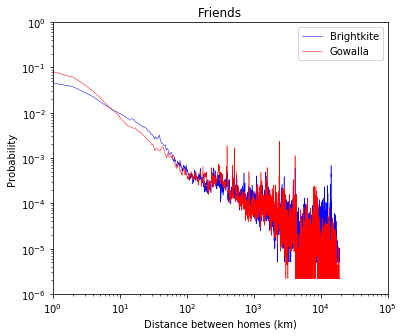

In [46]:
# Let's plot the two distributions on a logscale
# Plot
plt.figure(figsize=(6,5))
# Lines
plt.loglog(dist_bk,p_bk,linewidth=0.5,color='blue',linestyle='-')
plt.loglog(dist_gw,p_gw,linewidth=0.5,color='red',linestyle='-')
# set axis limits as in paper
plt.xlim(1,1e5)
plt.ylim(1e-6,1)
plt.xlabel('Distance between homes (km)')
plt.ylabel('Probability')
plt.legend(['Brightkite','Gowalla'])
plt.title('Friends');

We can clearly see the shape of the distributions as presented in the paper. However, we have a lot of noise especially with big distances as logging the xaxis compresses the values. We will get rid of this noise by computing the cdf instead of pmf. Later, we will compute it's derivative but by changing exponentially the step size in the next section to obtain a smooth pmf.

## 6.3. Compute cdfs and it's derivative (with changing step) and display  distance distribution

In [47]:
def get_pmf_2(vals):
    """
    This function computes the pmf by differentiating the cdf. The deltaX of the differentiation is constant
    in a logarithmic scale. The purpose of that is obtain a smooth pmf curve in logarithmic scale.
    
    Input: 
    -- vals: an np.array of positive integers
    Output:
    -- val: unique values of the array vals;
    -- p: probability of occurance of each value in val
    
    """ 
    # Compute cdf
    y = np.cumsum(np.bincount(vals)[1:])
    y = y / y[-1]
    x = list(range(1, max(vals) + 1))
    
    # Compute it's derivative (the step size of the gradient is increasing exponentially)
    # Redistribute the x vector in logspace
    val = np.logspace(0,np.log2(np.max(x)),base=2,num=50)
    # Interpolate the cdf with respect to the previously defined vector 
    log_y = np.interp(val,x,y)
    # Compute the gradient of log_y with respect to val
    p = np.gradient(log_y,val)
    
    # Correct p 
    
    p = p/np.sum(p)
    
    return val, p

In [48]:
# Recompute the distributions using the new pmf function
dist_bk,p_bk = get_pmf_2(df_dist_brightkite.distance.values)
dist_gw,p_gw = get_pmf_2(df_dist_gowalla.distance.values)

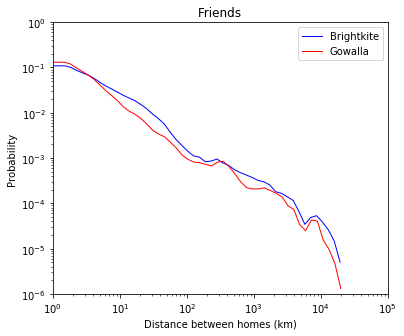

In [49]:
# Let's plot these two new distributions on a logscale
# Plot
plt.figure(figsize=(6,5))
# Lines
plt.loglog(dist_bk,p_bk,linewidth=1,color='blue',linestyle='-')
plt.loglog(dist_gw,p_gw,linewidth=1,color='red',linestyle='-')
# set axis limits as in paper
plt.xlim(1,1e5)
plt.ylim(1e-6,1)
plt.xlabel('Distance between homes (km)')
plt.ylabel('Probability')
plt.legend(['Brightkite','Gowalla'])
plt.title('Friends');

Now, we have much cleaner distributions. We will use it then in replicating Fig 2.a of the paper.

## 6.4 Replication

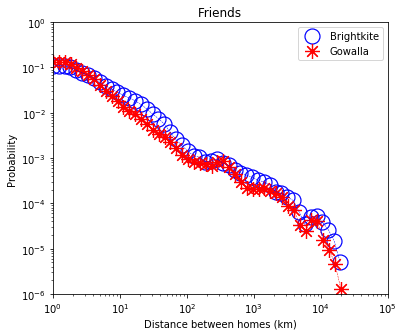

In [50]:
# Plot
plt.figure(figsize=(6,5))
# Markers
plt.loglog(dist_bk,p_bk,marker = 'o',markeredgecolor='blue',color='none',ms=15,mew=1.2)
plt.loglog(dist_gw,p_gw/np.sum(p_gw),marker = (8, 2),markeredgecolor='red',color='none',ms=15,mew=1.2)
# Lines
plt.loglog(dist_bk,p_bk,linewidth=0.5,color='blue',linestyle='--')
plt.loglog(dist_gw,p_gw,linewidth=0.5,color='red',linestyle='--')
# set axis limits as in paper
plt.xlim(1,1e5)
plt.ylim(1e-6,1)
plt.xlabel('Distance between homes (km)')
plt.ylabel('Probability')
plt.legend(['Brightkite','Gowalla'])
plt.title('Friends');

# 7. Discussion

For this assignment, I tried to replicate Fig 2.a from the paper Frindship and Mobility written by E. Cho, S. A. Myers, and J. Leskovec. 

I tried to replicate the same steps discribed in the second section of paper:

1. Discretizing the world into 25x25$km^2$
2. Find users' homes coordinates by averaging check-ins locations in the most visited square
3. Compute distance between friends'homes
4. Plot distance distributions

In addition to that, I corrected the longitude and latitude which contained some erroneous data for some users.
I also removed duplicated friendships from edges dataframes. These two steps were not described in the paper.

The figure we obtain is very similar to the proposed one in the paper. We can see the kink around 100km both in Gowalla and brightkite data.

Morover, I underestimated the number of hours needed to replicate this figure. I took me around 10 hours of work and up to 2 more for executing and checking some scripts.